## DATA ANALYSIS

**This notebook performs an exploratory data analysis to understand the factors influencing students' performance index (`Performance Index`), using the provided dataset. The objective is to identify initial patterns and correlations.**

In [1]:
import warnings 
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv(r'C:\Users\Rodrigo Lapsky\Documents\Dados\Data_analysis\Students_Perfomance\StudentPerformance.csv')

In [3]:
df.head() 

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
# Converting the string values to int64 in order to create the correlation matrix
df['Extracurricular Activities']=df['Extracurricular Activities'].replace({'Yes':1, 'No':0})

In [5]:
df.head() 

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


In [7]:
print(df.duplicated().sum())
df.isnull().sum()

127


Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
value=[]
for i in df.columns[0:21].tolist():
    print(i, ':', len(df[i].astype(str).value_counts()))
    value.append(len(df[i].astype(str).value_counts()))

Hours Studied : 9
Previous Scores : 60
Extracurricular Activities : 2
Sleep Hours : 6
Sample Question Papers Practiced : 10
Performance Index : 91


In [11]:
df.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000
mean,4.992100,69.441102,0.494986,6.531652,4.583004,55.216651
std,2.589081,17.325601,0.500000,1.697683,2.867202,19.208570
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,70.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


**The standard deviation shows us how much Previous Scores and Performance Index columns have a large variation of scores.**

In [12]:
df['Performance Index'].value_counts()

Performance Index
67.0     182
45.0     181
56.0     179
49.0     177
40.0     176
        ... 
14.0       7
99.0       6
11.0       5
100.0      3
10.0       1
Name: count, Length: 91, dtype: int64

In [13]:
#Correlation matrix
df.corr()['Performance Index'].sort_values(ascending=False)

Performance Index                   1.000000
Previous Scores                     0.915135
Hours Studied                       0.375332
Sleep Hours                         0.050352
Sample Question Papers Practiced    0.043436
Extracurricular Activities          0.026075
Name: Performance Index, dtype: float64

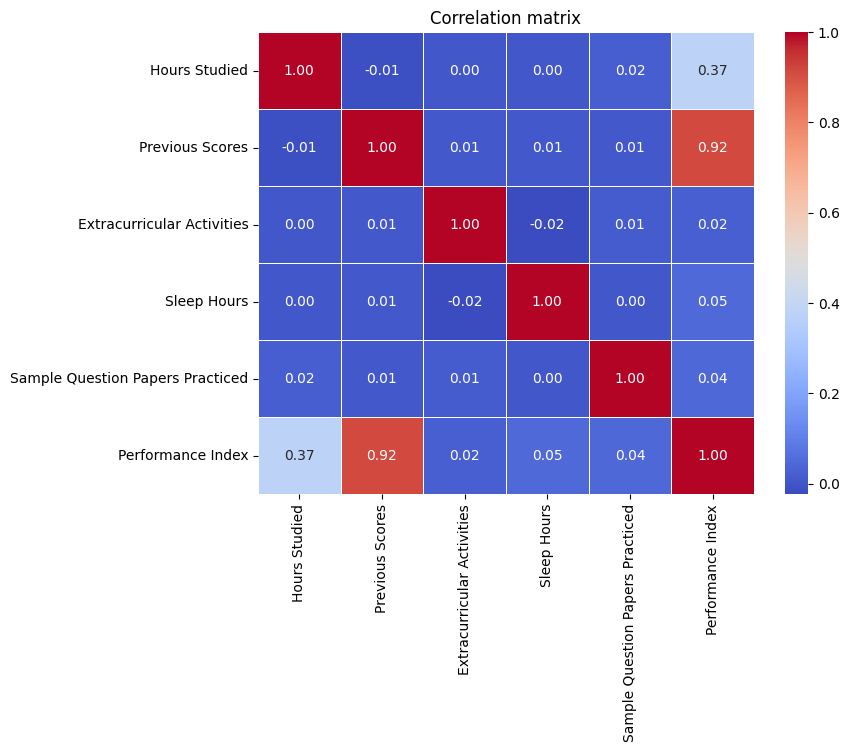

In [28]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            linewidths=0.5)

plt.title("Correlation matrix")
plt.show();                     

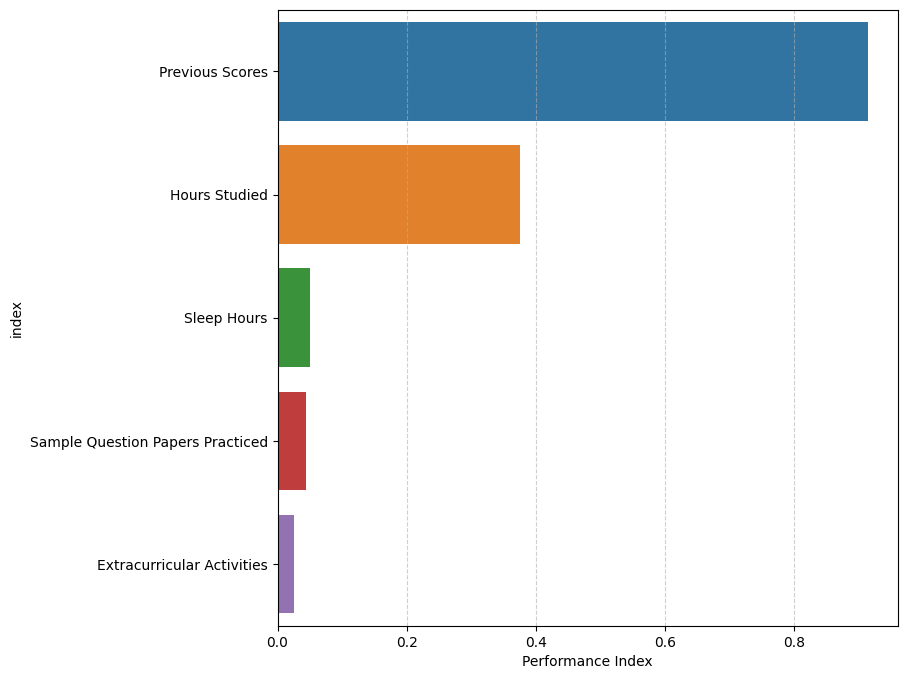

In [14]:
graf = df.corr()['Performance Index'].sort_values(ascending=False).reset_index()

plt.figure(figsize=(8,8))
sns.barplot(data=graf.iloc[1:],
            x=graf['Performance Index'],
            y='index',
            palette='tab10')

plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.show();



In [15]:
#Creating a copy of the column, but with a string type, for better representation in other types of graphs
df['Performance Index_copy'] = df['Performance Index'].copy()

In [16]:
bins=[0,50,80,100]
labels=['low(0-50)','medium(51-80)','high(81-100)']
df['Performance Index_copy']=pd.cut(df['Performance Index_copy'],bins=bins,labels=labels)

bins=[0,50,80,100]
labels=['low(0-50)','medium(51-80)','high(81-100)']
df['Previous Scores']=pd.cut(df['Previous Scores'],bins=bins,labels=labels)

In [17]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Performance Index_copy
0,7,high(81-100),1,9,1,91.0,high(81-100)
1,4,high(81-100),0,4,2,65.0,medium(51-80)
2,8,medium(51-80),1,7,2,45.0,low(0-50)
3,5,medium(51-80),1,5,2,36.0,low(0-50)
4,7,medium(51-80),0,8,5,66.0,medium(51-80)


In [18]:
df['Previous Scores'].value_counts()

Previous Scores
medium(51-80)    4950
high(81-100)     3143
low(0-50)        1780
Name: count, dtype: int64

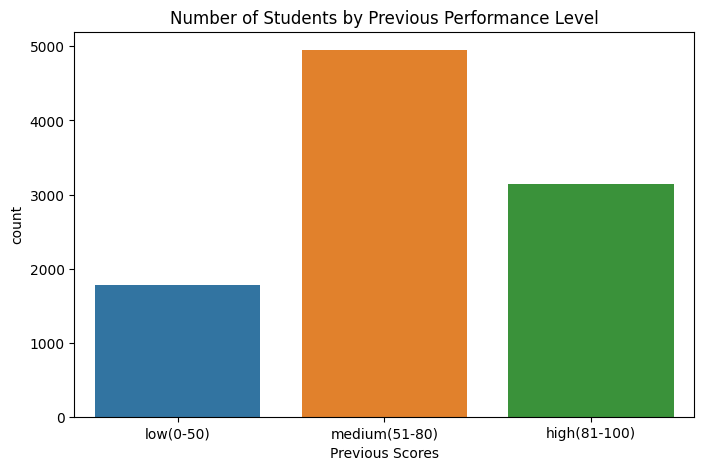

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,
            x='Previous Scores',
            palette='tab10')

plt.title("Number of Students by Previous Performance Level")
plt.show();            

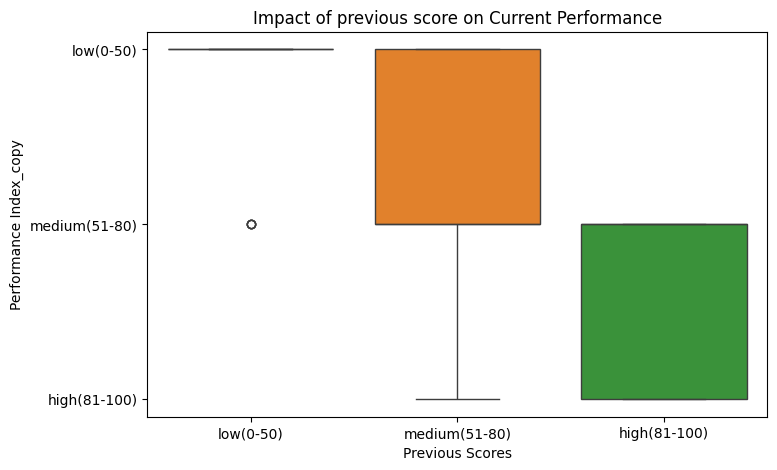

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df,
            x='Previous Scores',
            y='Performance Index_copy',
            palette='tab10')

plt.title("Impact of previous score on Current Performance")
plt.show();  


**The graphic representation and the correlation matrix show that previous exam scores directly impact current scores. The presence of an outlier also indicates specific cases where students significantly improved their performance compared to their prior results.**

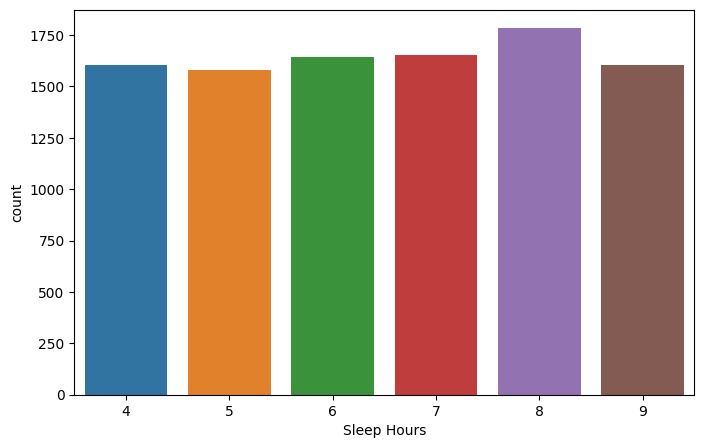

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,
            x='Sleep Hours',
            palette='tab10')
plt.show();

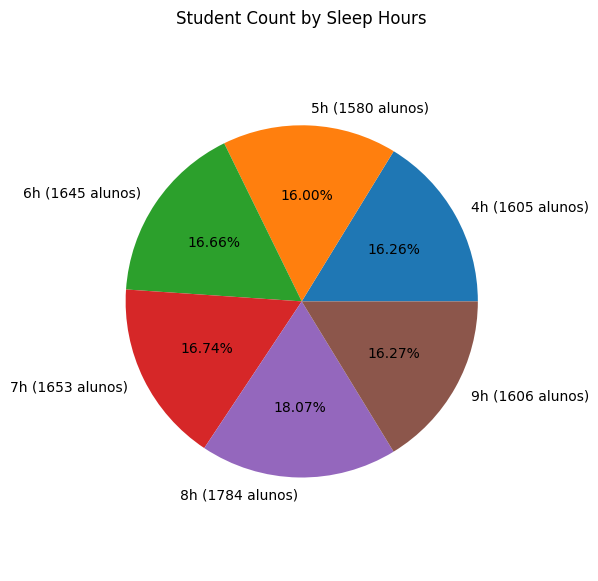

In [23]:
counts = df['Sleep Hours'].value_counts().sort_index()
sizes = counts.values
labels = [f'{h}h ({c} alunos)' for h, c in zip(counts.index, sizes)] 

plt.figure(figsize=(6, 6))
plt.pie(sizes, 
        labels=labels,                   
        autopct='%1.2f%%',                
        colors=plt.cm.tab10.colors)      

plt.title('Student Count by Sleep Hours')
plt.axis('equal') 
plt.tight_layout()
plt.show()

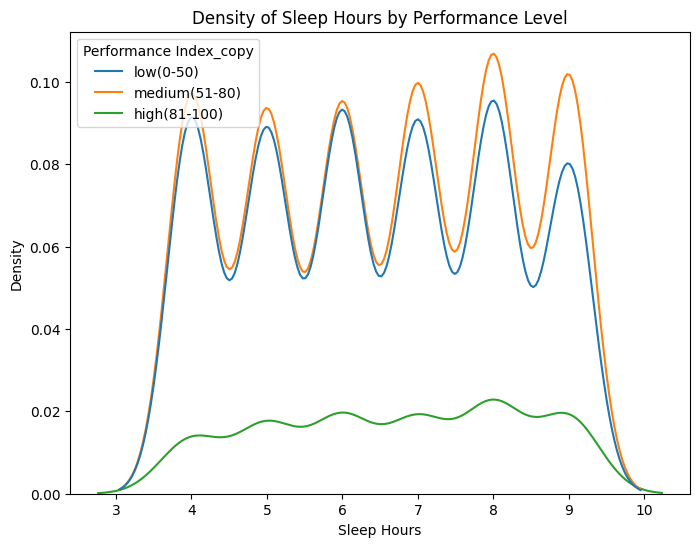

In [24]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, 
            x='Sleep Hours', 
            hue='Performance Index_copy', 
            fill=False,               
            palette='tab10')        

plt.title("Density of Sleep Hours by Performance Level")
plt.show()


**In this graph, it is possible to see that sleep hours somehow affect the current grades of students. However, it is also possible to notice that there are cases of students with high grades who sleep few hours, and those who study a lot and get low grades (low performance).**

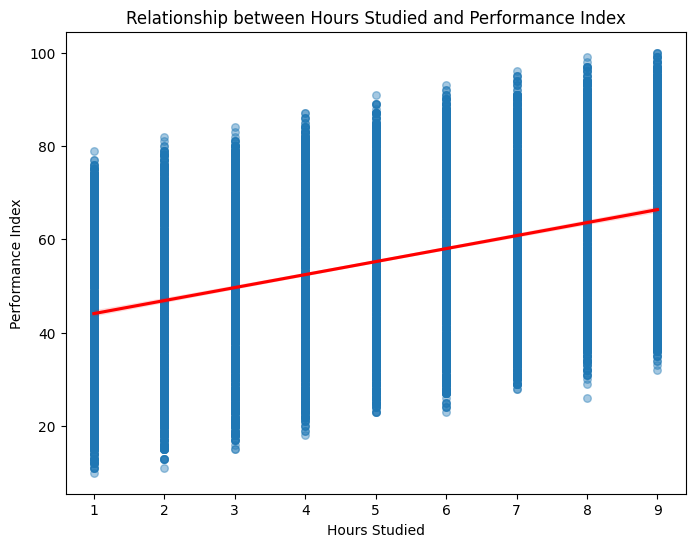

In [27]:
plt.figure(figsize=(8,6))
sns.regplot(data=df,
            x='Hours Studied',
            y='Performance Index',
            ci=95,
            scatter_kws={'alpha':0.4,'s':30,},
            line_kws={'color': 'red'})

plt.title("Relationship between Hours Studied and Performance Index")
plt.show();

**The regplot visualization demonstrates that the performance index tends to rise proportionally to the number of hours studied.**

<Figure size 800x600 with 0 Axes>

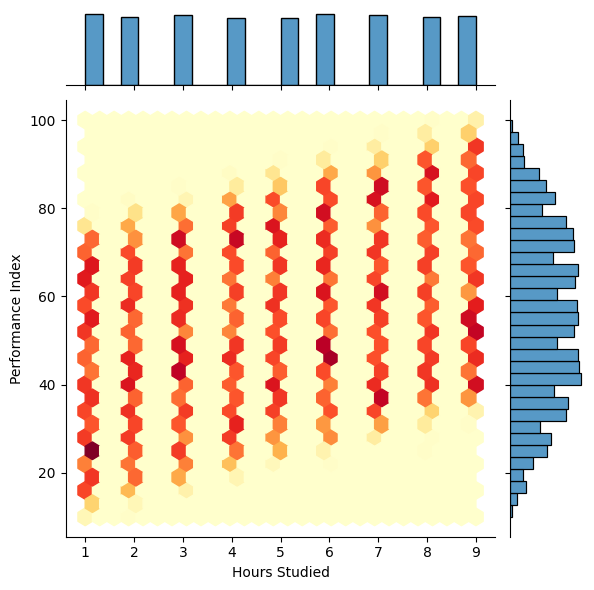

In [30]:
plt.figure(figsize=(8,6))
sns.jointplot(data=df,
            x='Hours Studied',
            y='Performance Index',
            kind='hex',
            cmap='YlOrRd')

plt.show();
              

**The data reveals a moderate positive correlation; students who dedicate more hours to studying tend to achieve higher grades, on average.
Significant Variation: The plot, however, displays high variability in outcomes. Final academic performance does not depend solely on study time, which is evident through the outliers (atypical cases of students with high grades studying little, or low grades studying a lot).**